<a href="https://colab.research.google.com/github/tsakailab/sandbox/blob/master/of_ciliary_bests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
dl_path="/content/drive/MyDrive/"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data_path = "/content/drive/MyDrive/Colab Notebooks/PCD/"
avi_filename = "20200626_092811 40X.avi"
import cv2
import numpy as np
#read the movie
cap = cv2.VideoCapture(data_path + avi_filename)
nframes = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(nframes)

324


In [3]:
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
print(width, height, fps)

1920 1080 30.0


In [4]:
from matplotlib import pyplot as plt

#from google.colab.patches import cv2_imshow
from IPython.display import clear_output

swidth, sheight = width // 2, height // 2

ret, ima = cap.read()
ima = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)
ima = cv2.resize(ima, (swidth, sheight))

ims = []
flows = []
for i in range(nframes-1):
    ret, imb = cap.read()
    imb = cv2.cvtColor(imb, cv2.COLOR_BGR2GRAY)
    imb = cv2.resize(imb, (swidth, sheight))

#    '''
    # pyrScale, levels, winsize, iterations, polyN, polySigma, flags
    flow = cv2.calcOpticalFlowFarneback(ima, imb, flow=None,
                                        pyr_scale=0.5, levels=3, winsize=7,
                                        iterations=3, poly_n=5, poly_sigma=1.1, flags=0)
    flows.append(flow)
#    '''

    ims.append( ima )
    ima = imb

## Show AVI and optical flow sequence

In [54]:
from matplotlib import animation, rc
from IPython.display import HTML

plts = []
fig = plt.figure()
for im in ims: plts.append([plt.imshow(im, cmap='gray', vmin=0, vmax=255)])
#for im in ims[:10]: plt.imshow(im, cmap='gray'); plt.show()
anim_avi = animation.ArtistAnimation(fig, plts, interval=100, blit=True)
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
plt.close(anim_avi._fig)

HTML(anim_avi.to_html5_video())


In [55]:
from matplotlib import animation, rc
from IPython.display import HTML

hsv = np.zeros((sheight, swidth, 3), dtype='uint8')
hsv[...,2] = 255
#hsv = cv2.resize(hsv, (swidth, sheight))

plts = []
fig = plt.figure()
for flow in flows:
    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,1] = mag*64
    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)
    plts.append([plt.imshow(rgb)])

anim_flow = animation.ArtistAnimation(fig, plts, interval=100, blit=True)
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
plt.close(anim_flow._fig)

HTML(anim_flow.to_html5_video())

In [56]:
%matplotlib inline
HTML(anim_avi.to_html5_video() + anim_flow.to_html5_video())
#HTML(anim_avi.to_html5_video())
#HTML(anim_flow.to_html5_video())

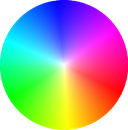

In [57]:
from matplotlib import animation, rc
from IPython.display import HTML

imsk_filename = "20200626_092811 40X_mask.png"
imsk = cv2.imread(data_path + imsk_filename)

imsk = cv2.resize(imsk, (swidth, sheight))
roi_mask = (imsk == [0,0,255]).all(axis=2)  # Create a boolean mask for ROI

plts = []
fig = plt.figure()
for im in ims:
    im = im * roi_mask
    plts.append([plt.imshow(im, cmap='gray', vmin=0, vmax=255)])
#for im in ims[:10]: plt.imshow(im, cmap='gray'); plt.show()
anim_avi_mskd = animation.ArtistAnimation(fig, plts, interval=33, blit=True)
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
plt.close(anim_avi_mskd._fig)

HTML(anim_avi_mskd.to_html5_video())


In [58]:
from matplotlib import animation, rc
from IPython.display import HTML

imsk_filename = "20200626_092811 40X_mask.png"
imsk = cv2.imread(data_path + imsk_filename)

imsk = cv2.resize(imsk, (swidth, sheight))
roi_mask = (imsk == [0,0,255]).all(axis=2)  # Create a boolean mask for ROI

hsv = np.zeros((sheight, swidth, 3), dtype='uint8')
hsv[...,2] = 255

plts = []
fig = plt.figure()

tflow = np.stack(flows)
print(tflow.shape)

tflow *= np.expand_dims(np.expand_dims(roi_mask, axis=2), axis=0)

for flow in tflow:
    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,1] = mag*64
    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)
    plts.append([plt.imshow(rgb)])

anim_flow_mskd = animation.ArtistAnimation(fig, plts, interval=100, blit=True)
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
plt.close(anim_flow_mskd._fig)

HTML(anim_flow_mskd.to_html5_video())

(323, 540, 960, 2)


In [60]:
HTML(anim_avi_mskd.to_html5_video() + anim_flow_mskd.to_html5_video())

## Features of the optical flow sequence

In [5]:
imsk_filename = "20200626_092811 40X_mask.png"
imsk = cv2.imread(data_path + imsk_filename)

imsk = cv2.resize(imsk, (swidth, sheight))
roi_mask = (imsk == [0,0,255]).all(axis=2)  # Create a boolean mask for ROI

tflow = np.stack(flows)
print(tflow.shape)
tflow *= np.expand_dims(np.expand_dims(roi_mask, axis=2), axis=0)
tmag, tang = cv2.cartToPolar(tflow[...,0], tflow[...,1])

(323, 540, 960, 2)


Random Index: (275, 429)


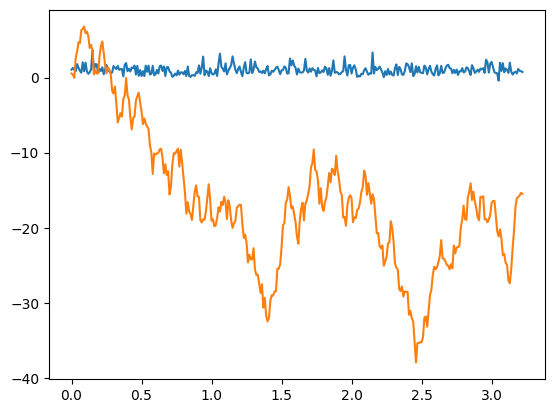

In [63]:
true_indices = np.argwhere(roi_mask)

# Randomly pick an index where the array contains True
random_index = true_indices[np.random.choice(len(true_indices))]

# Extract the row and column from the random index
row, col = random_index

print("Random Index: ({}, {})".format(row, col))

mag = np.unwrap(tmag[:,row,col])
ang = np.unwrap(tang[:,row,col])
t = np.arange(nframes-1)/100
plt.plot(t, mag, t, ang)

In [25]:
!pip -q install EMD-signal
from PyEMD import EMD

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.2 MB/s eta 0:00:00


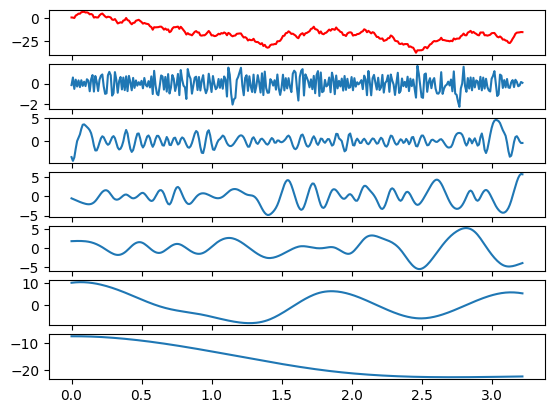

In [71]:
angIMFs = EMD()(ang)
m = len(angIMFs)
plt.subplot(m+1, 1, 1)
plt.plot(t, ang, 'r')
for i, aimf in enumerate(angIMFs):
    plt.subplot(m+1, 1, i+2)
    plt.plot(t, aimf)

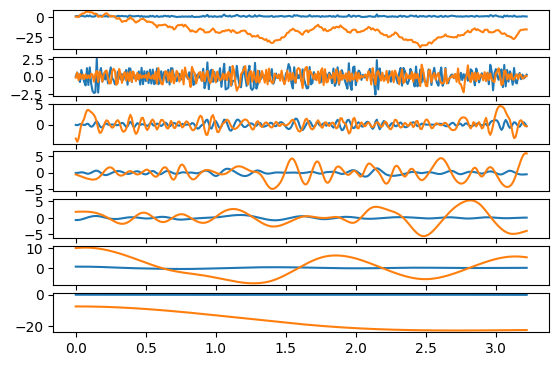

In [69]:
magIMFs = EMD()(mag)
angIMFs = EMD()(ang)
m = len(magIMFs)
plt.subplot(m+1, 1, 1)
plt.plot(t, mag, t, ang)
for i, (mimf, aimf) in enumerate(zip(magIMFs, angIMFs)):
    plt.subplot(m+1, 1, i+2)
    plt.plot(t, mimf*2, t, aimf)

In [72]:
!pip -q install pydmd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 4.5 MB/s eta 0:00:00


In [75]:
from pydmd import DMD